In [167]:
import numpy as np 

import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score


In [77]:
df = pd.read_csv('./data/Lung Cancer Dataset.csv')
print(df.columns)

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')


In [4]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [6]:
df.isnull().sum()


AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [7]:
df_subset = df.copy()
print(df_subset)

      AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0      68       1        1                     1              1   
1      81       1        1                     0              0   
2      58       1        1                     0              0   
3      44       0        1                     0              1   
4      72       0        1                     1              1   
...   ...     ...      ...                   ...            ...   
4995   32       0        1                     1              0   
4996   80       0        1                     1              1   
4997   51       1        0                     0              1   
4998   76       1        0                     1              0   
4999   33       0        1                     0              0   

      EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                         1                  0     57.831178                0   
1                         1      

In [69]:
df.shape

(5000, 17)

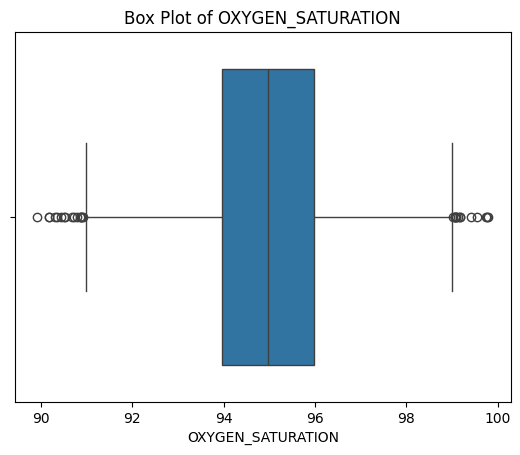

In [11]:
plt.figure()
sns.boxplot(x=df['OXYGEN_SATURATION'])
plt.title('Box Plot of OXYGEN_SATURATION')
plt.show()



Data after removing upper and lower outliers:
      AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0      68       1        1                     1              1   
1      81       1        1                     0              0   
2      58       1        1                     0              0   
3      44       0        1                     0              1   
4      72       0        1                     1              1   
...   ...     ...      ...                   ...            ...   
4995   32       0        1                     1              0   
4996   80       0        1                     1              1   
4997   51       1        0                     0              1   
4998   76       1        0                     1              0   
4999   33       0        1                     0              0   

      EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                         1                  0     57.831178        

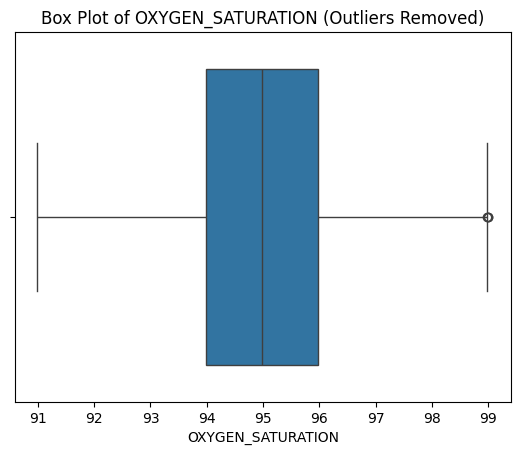

In [62]:
Q1 = df['OXYGEN_SATURATION'].quantile(0.25)
Q3 = df['OXYGEN_SATURATION'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['OXYGEN_SATURATION'] >= lower_bound) & (df['OXYGEN_SATURATION'] <= upper_bound)]

print("Data after removing upper and lower outliers:")
print(df_no_outliers)

plt.figure()
sns.boxplot(x=df_no_outliers['OXYGEN_SATURATION'])
plt.title('Box Plot of OXYGEN_SATURATION (Outliers Removed)')
plt.show()


In [84]:
df_no_outliers.shape, df_no_outliers.shape

((4970, 17), (4970, 17))

In [78]:
df['PULMONARY_DISEASE_BINARY'] = df['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})
print(df.head())

   AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0   68       1        1                     1              1   
1   81       1        1                     0              0   
2   58       1        1                     0              0   
3   44       0        1                     0              1   
4   72       0        1                     1              1   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                      1                  0     57.831178                0   
1                      1                  1     47.694835                1   
2                      0                  0     59.577435                0   
3                      1                  0     59.785767                0   
4                      1                  1     59.733941                0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \
0                0                    1                  1       

In [88]:
df['PULMONARY_DISEASE_BINARY'] = df['PULMONARY_DISEASE_BINARY'].astype(int)
df

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE_BINARY
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,1
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,1
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,0
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,0


In [94]:
print(df.dtypes)

AGE                           int64
GENDER                        int64
SMOKING                       int64
FINGER_DISCOLORATION          int64
MENTAL_STRESS                 int64
EXPOSURE_TO_POLLUTION         int64
LONG_TERM_ILLNESS             int64
ENERGY_LEVEL                float64
IMMUNE_WEAKNESS               int64
BREATHING_ISSUE               int64
ALCOHOL_CONSUMPTION           int64
THROAT_DISCOMFORT             int64
OXYGEN_SATURATION           float64
CHEST_TIGHTNESS               int64
FAMILY_HISTORY                int64
SMOKING_FAMILY_HISTORY        int64
STRESS_IMMUNE                 int64
PULMONARY_DISEASE_BINARY      int64
dtype: object


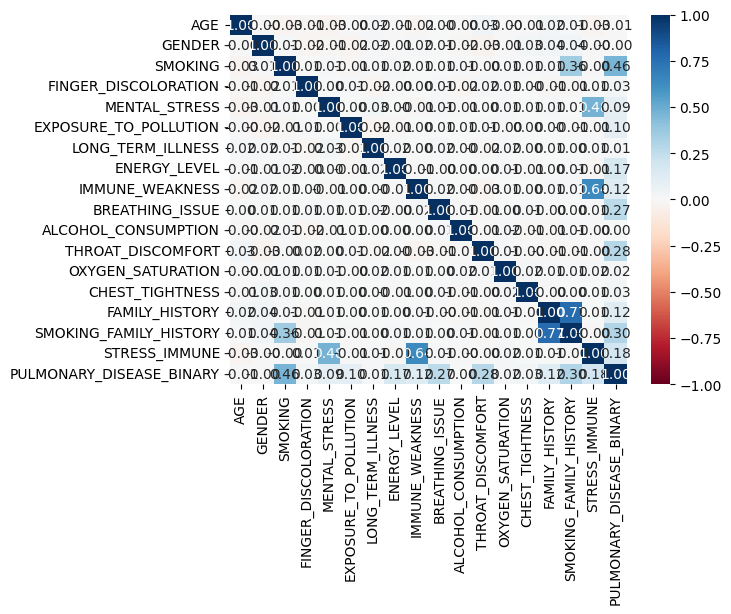

<Figure size 1500x1000 with 0 Axes>

In [116]:
correlations = df.corr()
sns.heatmap(correlations, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, annot=True)
linewidths=0.5
plt.figure(figsize=(15, 10))

plt.show()
#smoking, breathing issue, smoking family histry shows high correlation with outcome(lung cancer)

# smoking, breathing issue, smoking family histry shows high correlation with outcome(lung cancer)

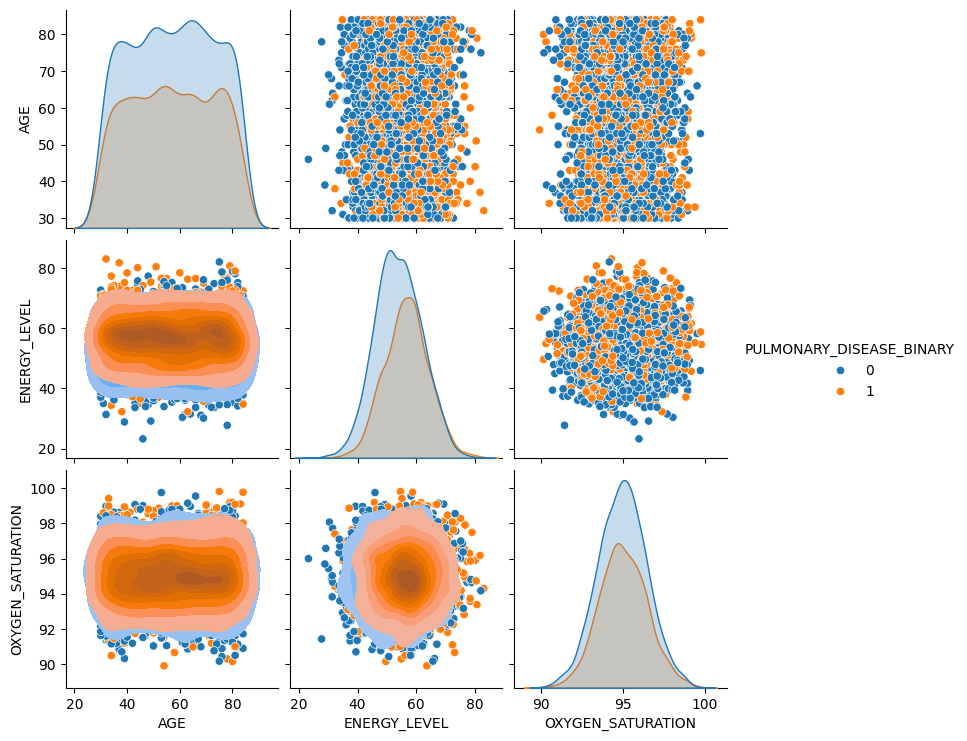

In [126]:
g= sns.pairplot(df,vars=['AGE','ENERGY_LEVEL','OXYGEN_SATURATION'], hue='PULMONARY_DISEASE_BINARY')
g.map_lower(sns.kdeplot, fill=True)

plt.show()

In [127]:
X = df.drop("PULMONARY_DISEASE_BINARY", axis=1)
y = df["PULMONARY_DISEASE_BINARY"]

In [128]:
X

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0


In [129]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4995    1
4996    1
4997    0
4998    0
4999    0
Name: PULMONARY_DISEASE_BINARY, Length: 5000, dtype: int64

In [55]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size =0.3, random_state =42)


In [80]:
X_train.shape, X_test.shape


((3500, 17), (1500, 17))

In [130]:
logreg = LogisticRegression(max_iter = 1000, random_state=0).fit(X_train, y_train)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [131]:
logreg.coef_

array([[ 3.30147226e-03,  2.01031164e-03,  3.22266207e+00,
         9.32993732e-02, -7.65397413e-02,  7.50596769e-01,
        -7.16721579e-03,  8.61926422e-02,  1.97902878e-01,
         2.88111833e+00, -5.66091365e-02,  2.57356757e+00,
         5.57295388e-02,  1.27886183e-01, -5.58013043e-01,
         1.99085585e+00,  1.69217322e+00]])

In [132]:
logreg.intercept_

array([-18.55946687])

In [133]:
y_pred = logreg.predict(X_test)

In [134]:
results = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_pred
})

In [135]:
results

,Actual,Predicted
1501,NO,NO
2586,NO,NO
2653,NO,NO
1055,NO,NO
705,NO,NO
...,...,...
3563,NO,NO
1538,YES,NO
1837,YES,YES
2380,NO,NO


# Performance matrix test

In [139]:
confusion_matrix(y_test, y_pred)


array([[785,  74],
       [ 69, 572]])

In [140]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          NO       0.92      0.91      0.92       859\n         YES       0.89      0.89      0.89       641\n\n    accuracy                           0.90      1500\n   macro avg       0.90      0.90      0.90      1500\nweighted avg       0.90      0.90      0.90      1500\n'

In [148]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [155]:
array = np.array(['YES', 'NO', 'YES', 'NO'])

# Use NumPy's vectorization for mapping
mapped_array = np.where(array == 'YES', 1, 0)

print(mapped_array)

[1 0 1 0]


In [160]:
# Map 'YES' to 1 and 'NO' to 0
y_pred = np.where(y_pred == 'YES', 1, 0)

print(y_pred)

[0 0 0 ... 1 0 1]


In [164]:
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE_BINARY
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


In [166]:

y_test = ['YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO']  # Ground truth
y_pred = ['YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES']  # Model predictions


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


precision = precision_score(y_test, y_pred, pos_label='YES')
print(f"Precision: {precision:.2f}")


recall = recall_score(y_test, y_pred, pos_label='YES')
print(f"Recall: {recall:.2f}")


f1 = f1_score(y_test, y_pred, pos_label='YES')
print(f"F1-Score: {f1:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NO', 'YES']))

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1-Score: 0.80

Classification Report:
              precision    recall  f1-score   support

          NO       0.80      0.80      0.80         5
         YES       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

